# Bank Marketing

### Introduction

The dataset is from UCI and is created by Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012 (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). It has 21 columns and 41188 rows. 

Attribute information:

Input variables:
   ### Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   ### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   ### Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   ### Social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csvs files and chcking their heads
df= pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Shape of the dataset
df.shape

(41188, 21)

In [4]:
#getting statistical data on the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#getting the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
#getting the data types in columns
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


#### Exploratory Data Analysis

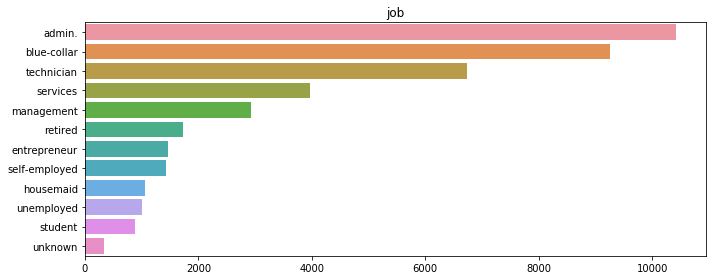

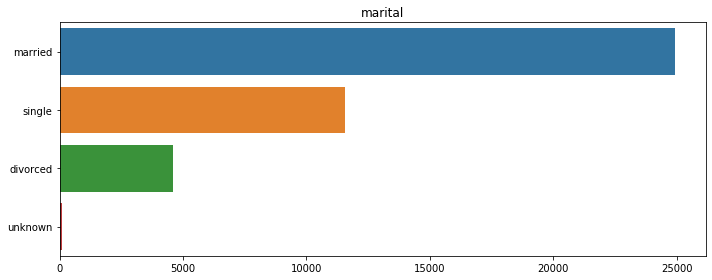

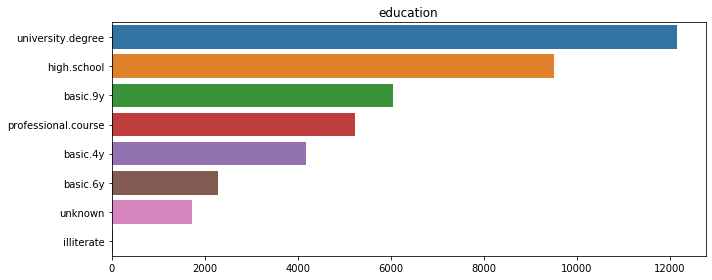

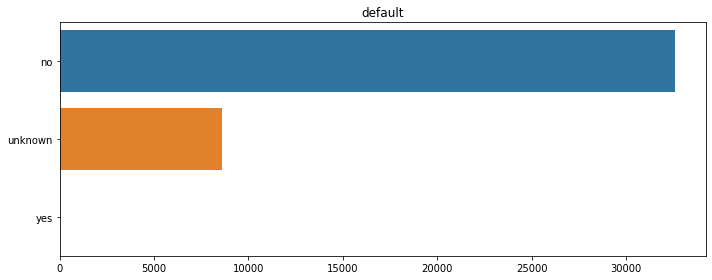

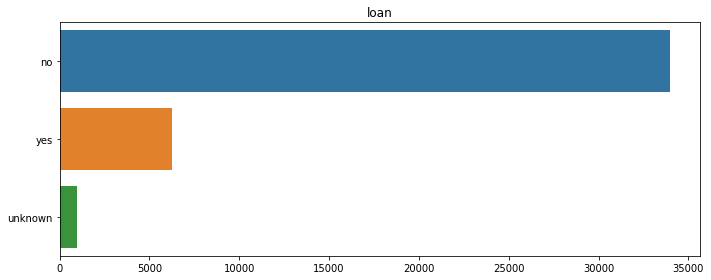

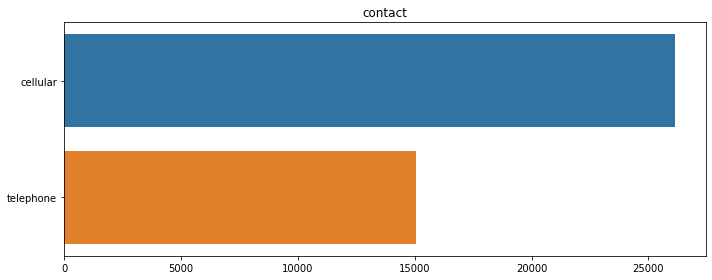

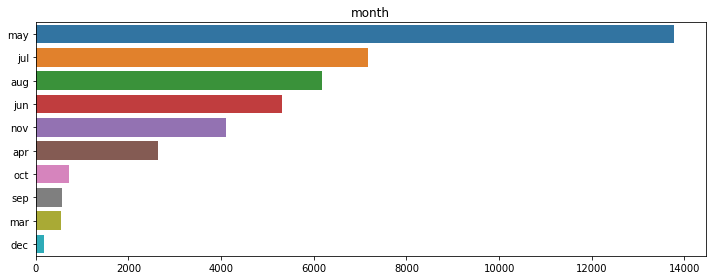

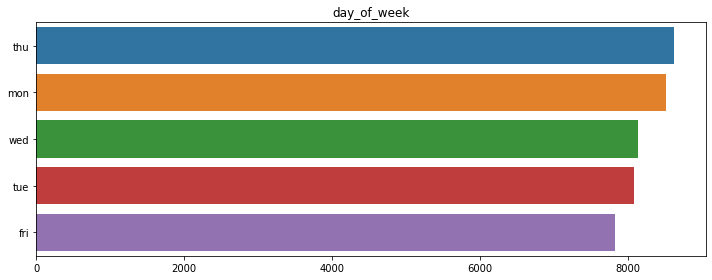

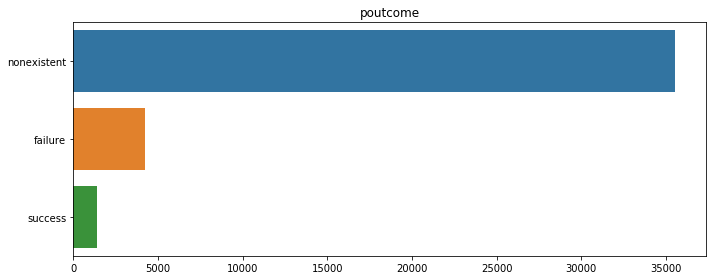

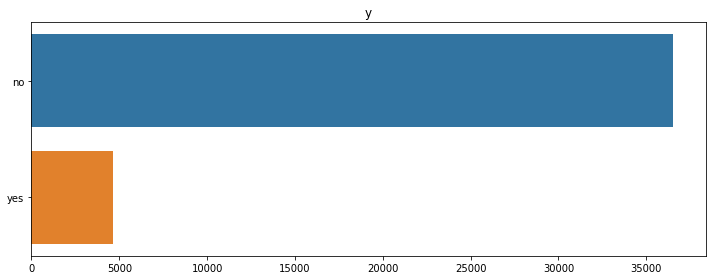

In [38]:
#Analyzing categorical data
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Text(0.5, 0, 'Target Class')

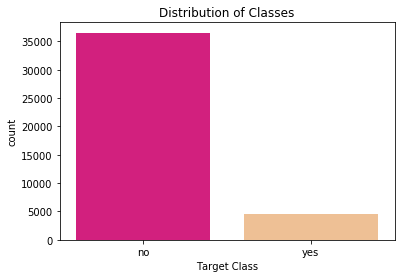

In [7]:
#making a countplot of the variable to be predicted
sns.countplot(x=df['y'], palette='Accent_r')
plt.title('Distribution of Classes')
plt.xlabel('Target Class')

In [8]:
#determining the count of each of the classes
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The dataset is very imbalanced.

### Visualization of the Bank Client Data

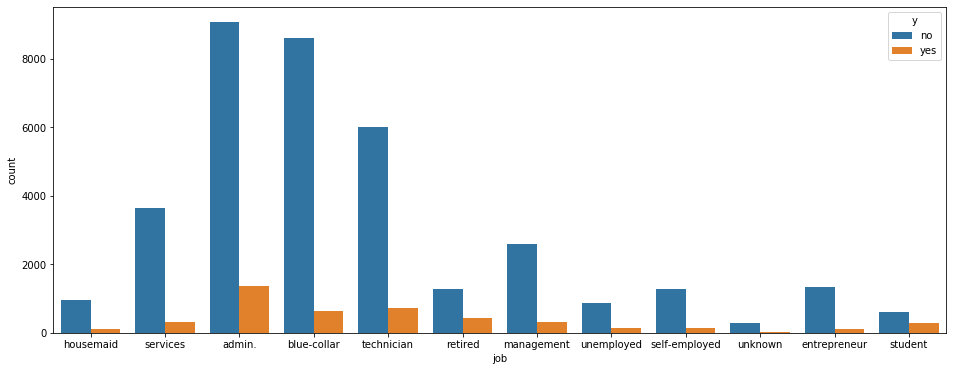

In [9]:
#plotting the number of successful campaigns with regards to job type
plt.figure(figsize=(16,6))
sns.countplot(x='job', data=df, hue='y')


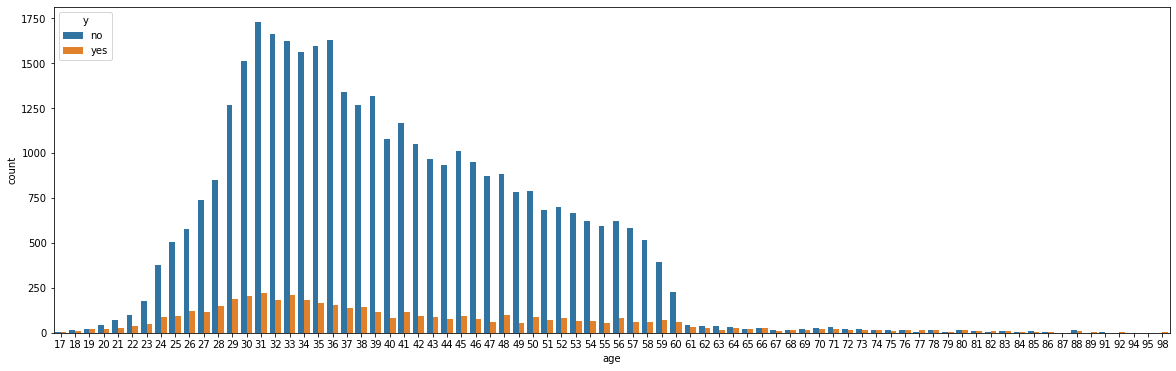

In [10]:
#plotting the number of successful campaigns with regards to age
plt.figure(figsize=(20,6))
sns.countplot(x='age', data=df, hue='y')

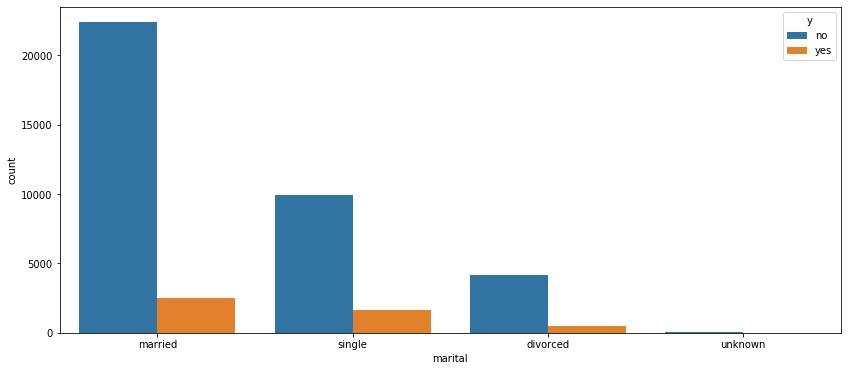

In [11]:
#plotting the number of successful campaigns with regards to marital status
plt.figure(figsize=(14,6))
sns.countplot(x='marital', data=df, hue='y')

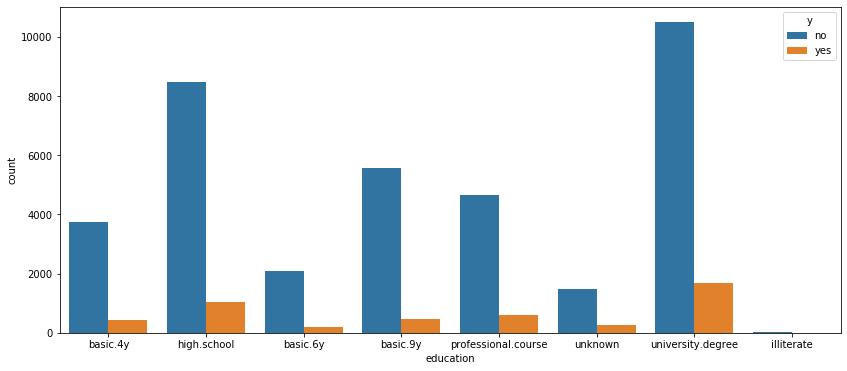

In [12]:
#plotting the number of successful campaigns with regards to education
plt.figure(figsize=(14,6))
sns.countplot(x='education', data=df, hue='y')

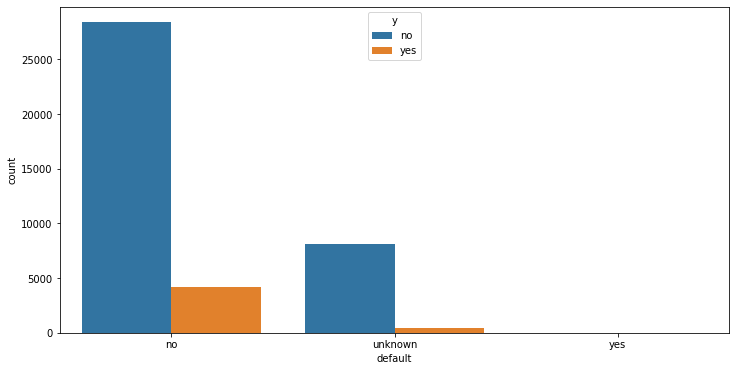

In [13]:
#plotting the number of successful campaigns with regards to credit status (has credit in default or no)
plt.figure(figsize=(12,6))
sns.countplot(x='default', data=df, hue='y')

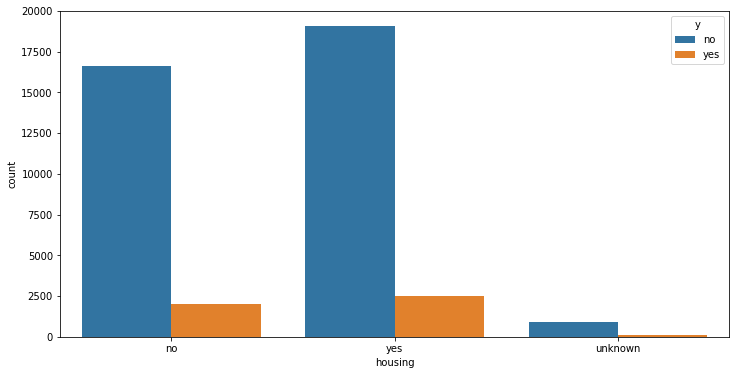

In [14]:
#plotting the number of successful campaigns with regards to housing loan
plt.figure(figsize=(12,6))
sns.countplot(x='housing', data=df, hue='y')

### Visualization of the Data Related with the last contact of the current campaign

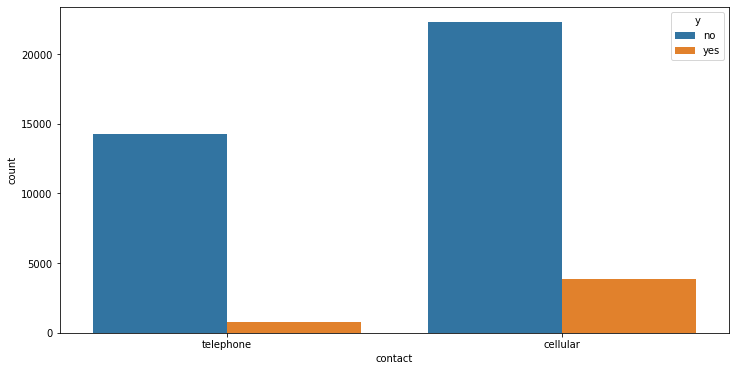

In [15]:
#plotting the number of successful campaigns with regards to type of contact (cellular vs telephone)
plt.figure(figsize=(12,6))
sns.countplot(x='contact', data=df, hue='y')

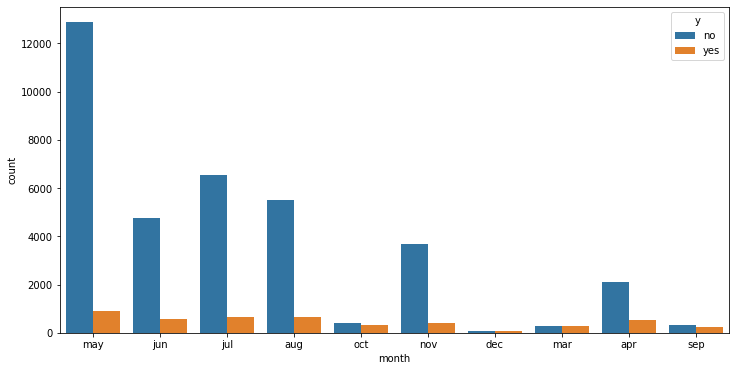

In [16]:
#plotting the number of successful campaigns with regards to last month contacted
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df, hue='y')

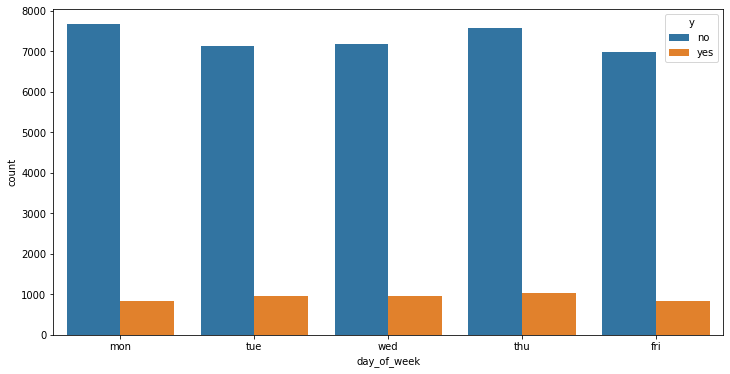

In [17]:
#plotting the number of successful campaigns with regards to day of the week contacted
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week', data=df, hue='y')

In [18]:
#binning the contact duration in ~360 second bins
bins = np.linspace(df.duration.min(), df.duration.max(), 17)
labels = ['0-5','5-10','10-15','15-20', '20-25', '25-30', '30-35' ,'35-40', '40-45','45-50','50-55', '55-60', '60-65', 
          '65-70','70-75','75-80']
df['duration(min)'] = pd.cut(df['duration'], bins=bins, labels=labels)

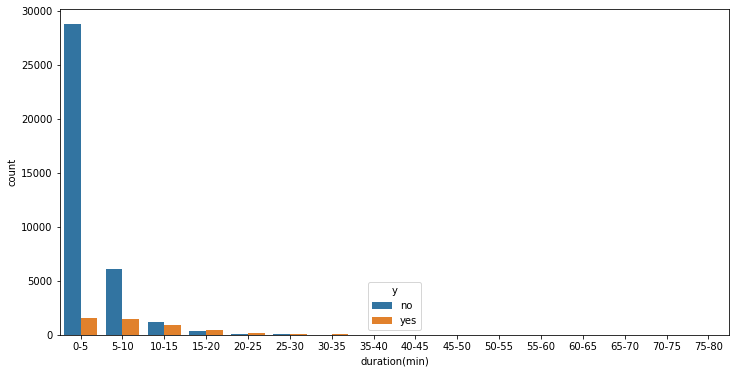

In [19]:
#plotting the number of successful campaigns with regards to day of the duration of cotact in seconds
plt.figure(figsize=(12,6))
sns.countplot(x='duration(min)', data=df, hue='y')

### Visualization of Data for Other Attributes

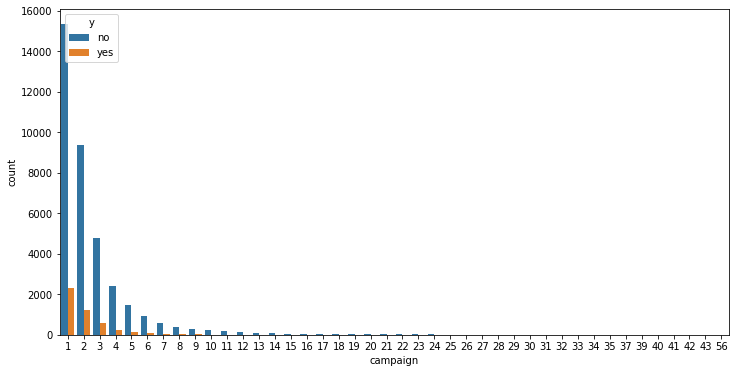

In [20]:
#plotting the number of successful campaigns with regards to day of the number of contacts during the campaign
plt.figure(figsize=(12,6))
sns.countplot(x='campaign', data=df, hue='y')

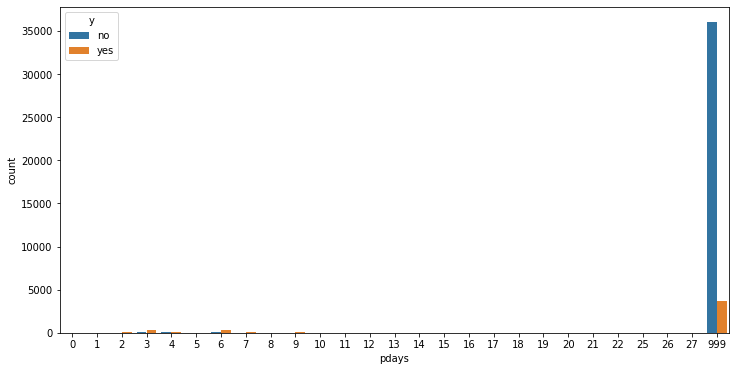

In [21]:
#plotting the number of successful campaigns with regards to number of days that passed by after the client was last contacted from a previous campaign
plt.figure(figsize=(12,6))
sns.countplot(x='pdays', data=df, hue='y')

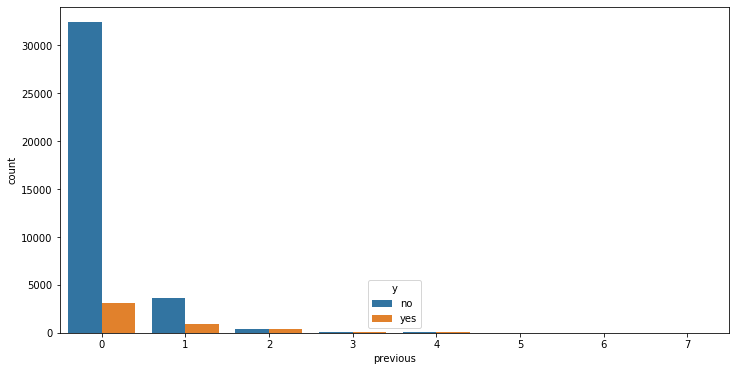

In [22]:
#plotting the number of successful campaigns with regards to number of contacts performed before this campaign and for this client
plt.figure(figsize=(12,6))
sns.countplot(x='previous', data=df, hue='y')

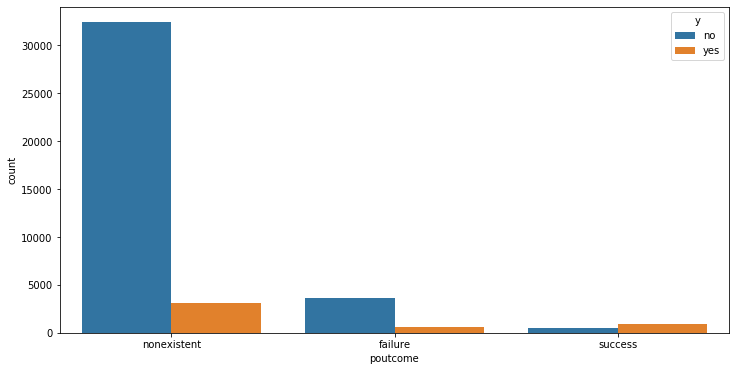

In [23]:
#plotting the number of successful campaigns with regards to outcome of the previous marketing campaign 
plt.figure(figsize=(12,6))
sns.countplot(x='poutcome', data=df, hue='y')

### Visualization of the Data for Social and economic context attributes

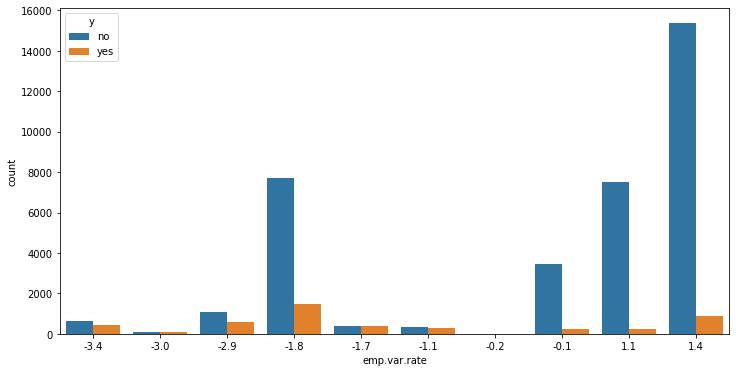

In [24]:
#plotting the number of successful campaigns with regards to employment variation rate - quarterly indicator  
plt.figure(figsize=(12,6))
sns.countplot(x='emp.var.rate', data=df, hue='y')

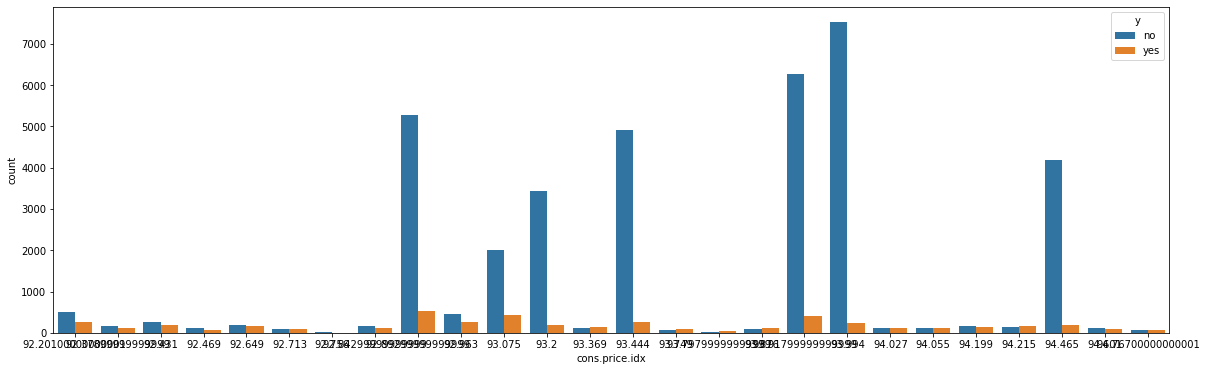

In [25]:
#plotting the number of successful campaigns with regards to consumer price index - monthly indicator   
plt.figure(figsize=(20,6))
sns.countplot(x='cons.price.idx', data=df, hue='y')

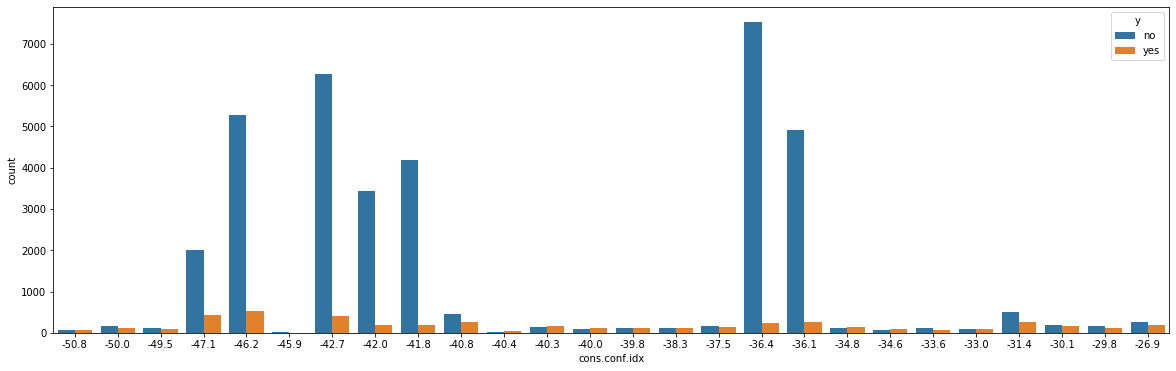

In [26]:
#plotting the number of successful campaigns with regards to consumer confidence index - monthly indicator
plt.figure(figsize=(20,6))
sns.countplot(x='cons.conf.idx', data=df, hue='y')

In [27]:
#binning the number of euribor 3 month rate - daily indicator 
bins = np.linspace(df.euribor3m.min(), df.euribor3m.max(), 5)
labels = ['0.634-1.737','1.737-2.839','2.839-3.942','3.942-5.045']
         
df['euribor3m(bins)'] = pd.cut(df['euribor3m'], bins=bins, labels=labels)

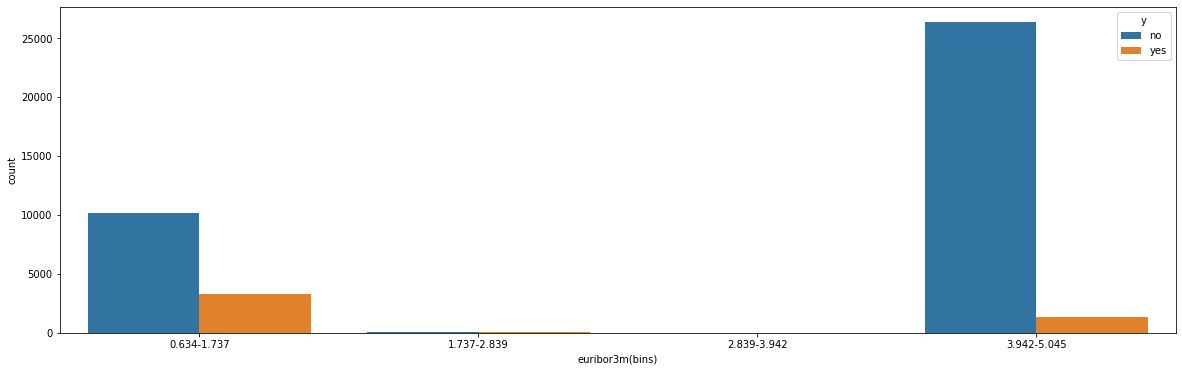

In [28]:
#plotting the number of successful campaigns with regards to : euribor 3 month rate - daily indicator
plt.figure(figsize=(20,6))
sns.countplot(x='euribor3m(bins)', data=df, hue='y')

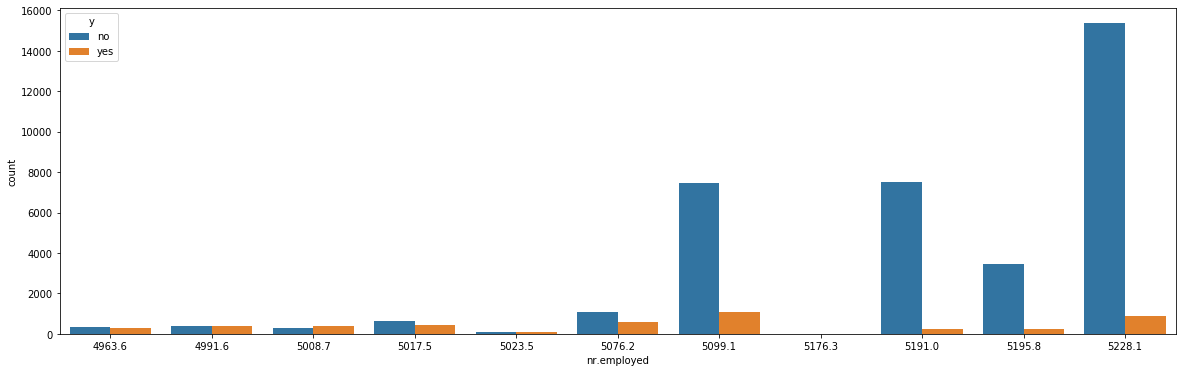

In [29]:
#plotting the number of successful campaigns with regards to number of employees - quarterly indicator
plt.figure(figsize=(20,6))
sns.countplot(x='nr.employed', data=df, hue='y')

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration(min),euribor3m(bins)
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0-5,3.942-5.045
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0-5,3.942-5.045
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0-5,3.942-5.045
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0-5,3.942-5.045
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0-5,3.942-5.045


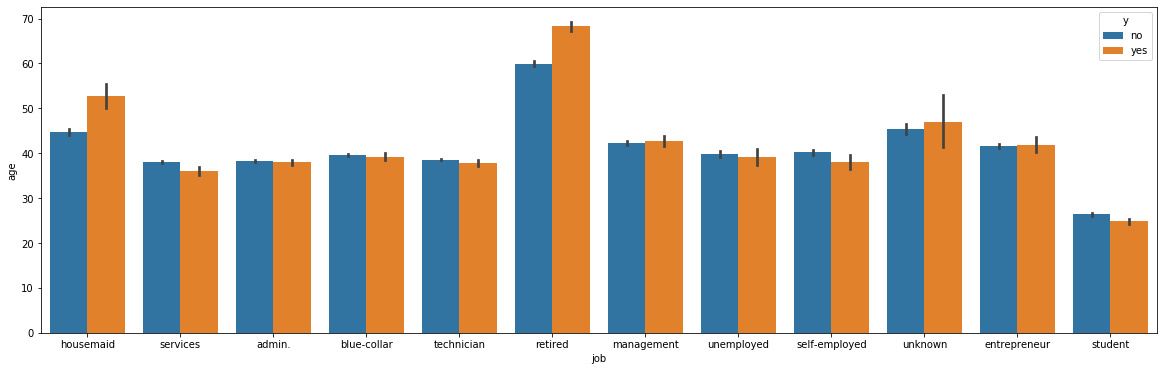

In [31]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='job', y='age', data=df, hue='y')

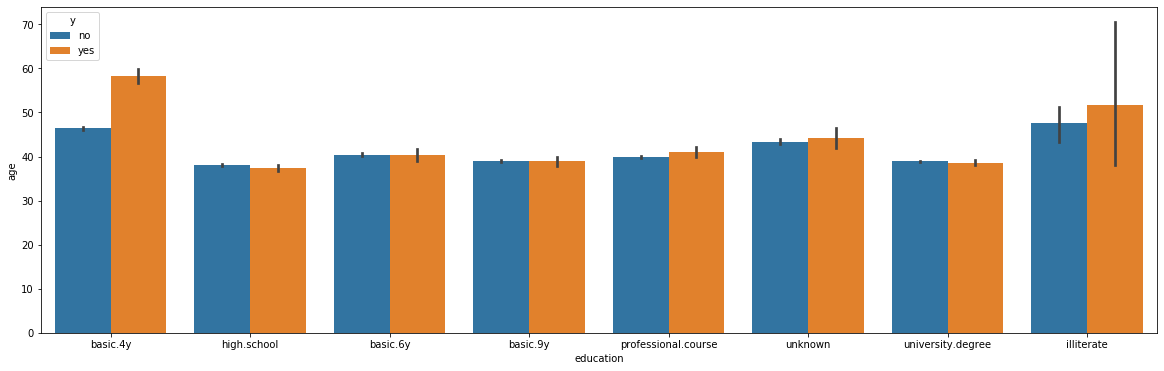

In [32]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='education', y='age', data=df, hue='y')

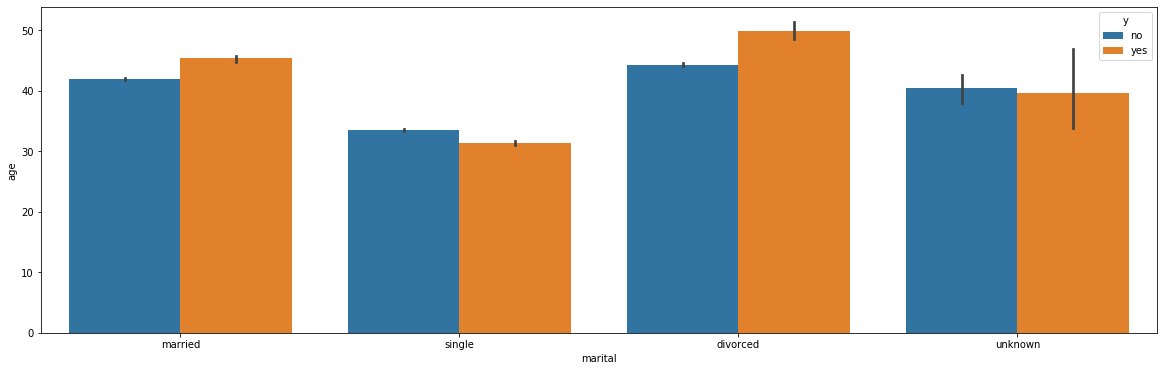

In [33]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='marital', y='age', data=df, hue='y')

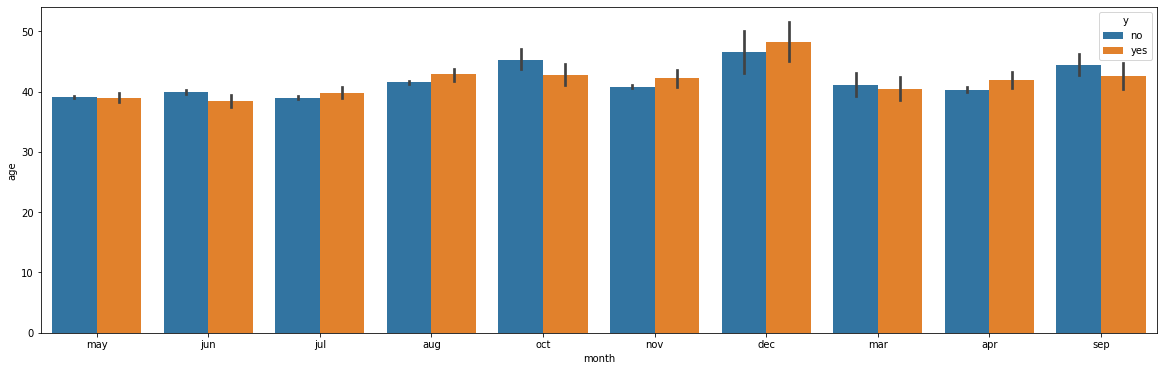

In [34]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='month', y='age', data=df, hue='y')

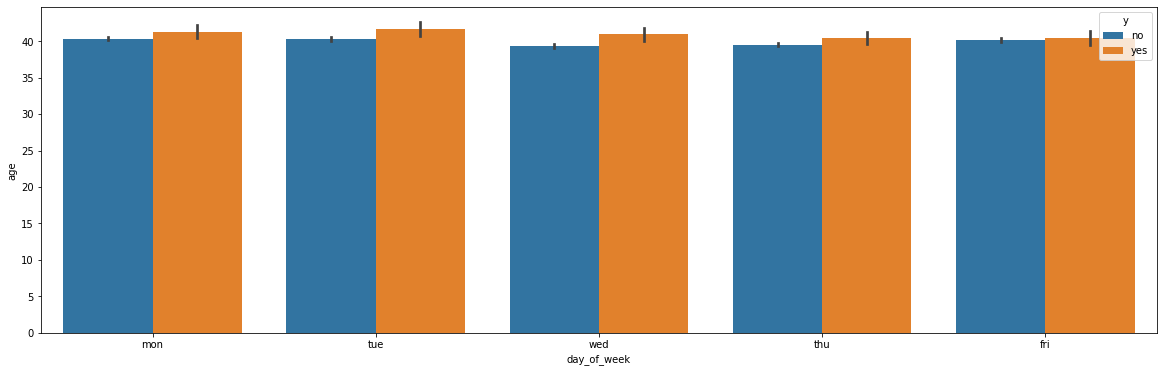

In [35]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='day_of_week', y='age', data=df, hue='y')

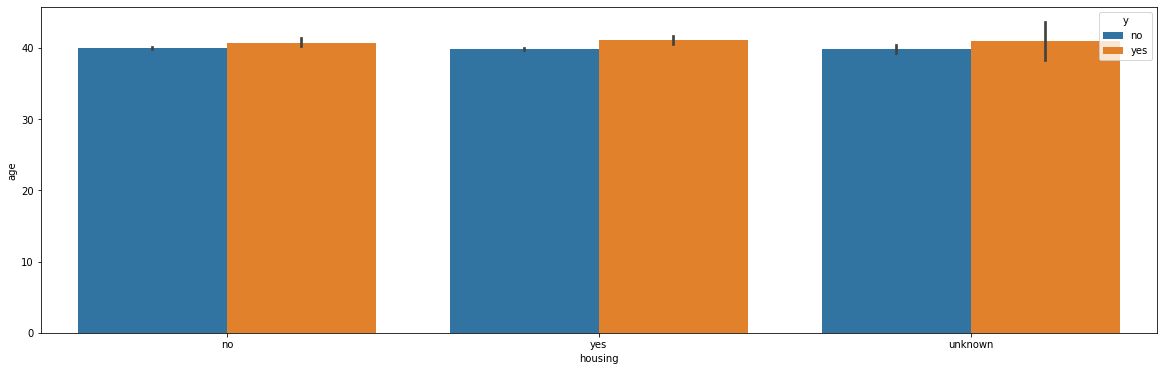

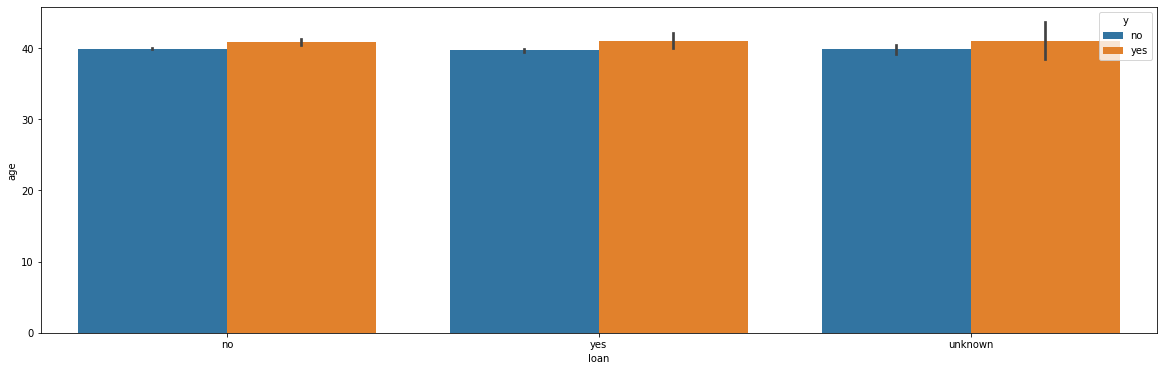

In [36]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='housing', y='age', data=df, hue='y')

#
plt.figure(figsize=(20,6))
sns.barplot(x='loan', y='age', data=df, hue='y')

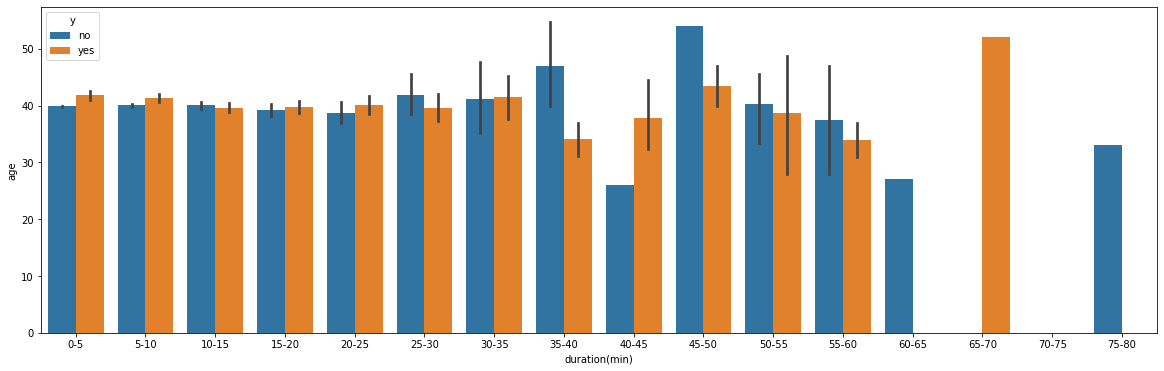

In [37]:
#
plt.figure(figsize=(20,6))
sns.barplot(x='duration(min)', y='age', data=df, hue='y')